## Homework 3 - DSE 220: Machine Learning
* logistic regression
* Perceptron
* SVM

### Discriminative Learning
For the questions in this section, load the wine dataset (wine original.csv). 

**Question 1**: Perform a 80-20 split using train test split on the data to obtain the train and the test data (random state=3). Use Logistic Regression to classify the wines according to their cultivators. Tune parameters 'penalty' and 'C' using GridSearchCV implementation. Report the accuracy on test data. (10 marks)

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Load the wine dataset
data = pd.read_csv('wine_original.csv')
labels = data['class']
labels -= 1
del data['class']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=3)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

parameters = { 'penalty': ['l1','l2'], 
              'C':[0.1, 0.5, 1, 2, 3, 4, 5, 10, 100, 200, 300, 400, 500, 600, 700, 800,900,1000]}
logreg = LogisticRegression()
clf = GridSearchCV(logreg, parameters, verbose=True, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
train_acc = accuracy_score(clf.predict(X_train), y_train)
print ('Selected Parameters', clf.best_params_)
print ('Training Accuracy = ' + str(train_acc))
print ('Test Accuracy = ' + str(accuracy))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Selected Parameters {'C': 500, 'penalty': 'l1'}
Training Accuracy = 1.0
Test Accuracy = 0.861111111111


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    3.8s finished


### Perceptron and Support Vector Machines
In this section, we will work on the text data. Download the newsgroups data (train and test) using fetch 20newsgroups for categories: 'alt.atheism', 'comp.graphics', 'sci.space' and 'talk.politics.mideast' after removing 'headers', 'footers' and 'quotes' from the data. Convert all the words in the text to lower case. A common practice is to remove the stopwords like a, and, the etc. from the text. Use nltk to get the stopwords list (nltk.corpus.stopwords) and remove the stopwords from the text. Use TfidfVectorizer to obtain the tfidf vectors(after smoothing\*) for the train and test data and select only top 2000 features(words). You can also perform the above stated actions (lowercase and stop-words) using the TfidfVectorizer. Note: You'll fit the tf-idf vectors on the train data and use the same to transform the test data. (10 marks)

\*: Smoothing the text data is same as computing the idf values after adding a document with all words in the vocabulary.

In [2]:
from sklearn.datasets import fetch_20newsgroups
cats = ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.politics.mideast']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=cats, remove=('headers', 'footers', 'quotes'))
y_train = newsgroups_train.target
y_test = newsgroups_test.target

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer=u'word',lowercase=True,stop_words='english',smooth_idf=True,max_features=2000)
# fit and transform on train data
X_train = vectorizer.fit_transform(newsgroups_train.data)
# just transform test data with previous fitting
X_test = vectorizer.transform(newsgroups_test.data)

**Question 2**: After obtaining the tf-idf vectors for train and test data, use the perceptron model (no penalty) to train on the training vectors and compute the accuracy on the test vectors. (5 marks)

In [3]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

clf = Perceptron(penalty=None)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print ('Perceptron test accuracy = ' + str(accuracy_score(y_test, pred)))

Perceptron test accuracy = 0.776048714479


**Question 3**: Keeping all the above data processing steps same observe how the test accuracy changes by varying the number of top features selected for 100, 200, 500, 1000, 1500, 2000, 3000 for a perceptron model. Report and plot the results.(10 mark)

Perceptron test accuracy with top 100 features: 0.6089
Perceptron test accuracy with top 200 features: 0.6766
Perceptron test accuracy with top 500 features: 0.7314
Perceptron test accuracy with top 1000 features: 0.7368
Perceptron test accuracy with top 1500 features: 0.7395
Perceptron test accuracy with top 2000 features: 0.7760
Perceptron test accuracy with top 3000 features: 0.7862


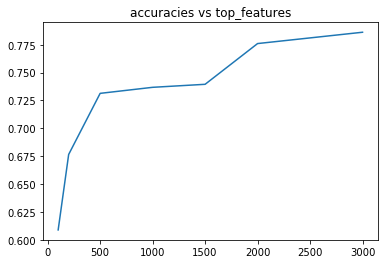

In [8]:
import matplotlib.pyplot as plt
accuracies = []
top_features = [100, 200, 500, 1000, 1500, 2000, 3000]
for nfeatures in top_features:
    vectorizer = TfidfVectorizer(analyzer=u'word',lowercase=True,stop_words='english',smooth_idf=True,max_features=nfeatures)
    X_train = vectorizer.fit_transform(newsgroups_train.data)
    X_test = vectorizer.transform(newsgroups_test.data)
    
    clf = Perceptron(penalty=None)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accu = accuracy_score(y_test, pred)
    accuracies.append(accu)
    print('Perceptron test accuracy with top %d features: %.4f' % (nfeatures, accu))

plt.plot(top_features, accuracies)
plt.title('accuracies vs top_features')
plt.show()

**Question 4**: After obtaining the tf-idf vectors for train and test data, use the SVM model to train on the training vectors and compute the accuracy on the test vectors. Use linear kernel and default parameters. (5 mark)

In [9]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

vectorizer = TfidfVectorizer(analyzer=u'word',lowercase=True,stop_words='english',smooth_idf=True,max_features=2000)
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)
y_train = newsgroups_train.target
y_test = newsgroups_test.target
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print ('SVM test accuracy = ' + str(accuracy_score(y_test, pred)))

SVM test accuracy = 0.794316644114


**Question 5**: Keeping all the above data processing steps same observe how the test accuracy changes by varying the number of top features selected for 100, 200, 500, 1000, 1500, 2000, 3000 for a linear SVM model. Report and plot the results.(10 mark)

SVM test accuracy with top 100 features: 0.6556
SVM test accuracy with top 200 features: 0.7138
SVM test accuracy with top 500 features: 0.7456
SVM test accuracy with top 1000 features: 0.7679
SVM test accuracy with top 1500 features: 0.7774
SVM test accuracy with top 2000 features: 0.7943
SVM test accuracy with top 3000 features: 0.8146


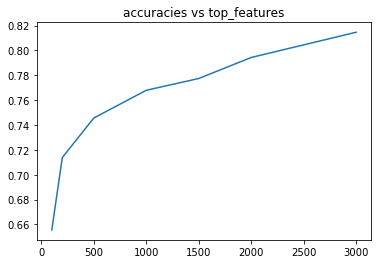

In [11]:
import matplotlib.pyplot as plt
accuracies = []
top_features = [100, 200, 500, 1000, 1500, 2000, 3000]
for nfeatures in top_features:
    vectorizer = TfidfVectorizer(analyzer=u'word',lowercase=True,stop_words='english',smooth_idf=True,max_features=nfeatures)
    X_train = vectorizer.fit_transform(newsgroups_train.data)
    X_test = vectorizer.transform(newsgroups_test.data)
    
    clf = SVC(kernel='linear')
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accu = accuracy_score(y_test, pred)
    accuracies.append(accu)
    print('SVM test accuracy with top %d features: %.4f' % (nfeatures, accu))

plt.plot(top_features, accuracies)
plt.title('accuracies vs top_features')
plt.show()

**Question 6**: Perform 80-20 split of the training data to obtain validation data using train test split (random state=10). Use this validation data to tune the cost parameter 'C' for values 0.01,0.1,1,10,100. Select the best value compute
the accuracy for the test data. Report the validation and test accuracies. Note: Use full data of 2000 vectors here. (10 marks)

In [17]:
from scipy.sparse import vstack,hstack
from sklearn.model_selection import train_test_split
import numpy as np

vectorizer = TfidfVectorizer(analyzer=u'word',lowercase=True,stop_words='english',smooth_idf=True,max_features=2000)
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)
y_train = newsgroups_train.target
y_test = newsgroups_test.target

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=10)
X_train_val = vstack([X_train, X_val])
y_train_val = np.concatenate([y_train, y_val])

best_C = 0
best_accu = 0
for C in [0.01,0.1,1,10,100]:
    clf = SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)
    pred_val = clf.predict(X_val)
    accu = accuracy_score(y_val, pred_val)
    print("SVM with C:{} validation accuracy: {}".format(C, accu))
    if best_accu < accu:
        best_C = C
        best_accu = accu
clf = SVC(kernel='linear', C=best_C)
clf.fit(X_train_val, y_train_val)
pred = clf.predict(X_test)
accu = accuracy_score(y_test, pred)
print("SVM with best C:{} test accuracy: {}".format(best_C, accu))

SVM with C:0.01 validation accuracy: 0.2449438202247191
SVM with C:0.1 validation accuracy: 0.7752808988764045
SVM with C:1 validation accuracy: 0.8359550561797753
SVM with C:10 validation accuracy: 0.8247191011235955
SVM with C:100 validation accuracy: 0.8089887640449438
SVM with best C:1 test accuracy: 0.7943166441136671


**Question 7**: Train a kernelized SVM (with 'C'=10000) with kernel values - 'poly' with degree 1, 2, 3, 'rbf ' and 'sigmoid', and report the one with best accuracy on validation data. Also report the test accuracy for the selected kernel. (10 marks)

In [23]:
best_kernel = ''
best_degree = 0
best_accu = 0
for deg in [1,2,3]:
    clf = SVC(C=10000, kernel='poly', degree = deg)
    clf.fit(X_train, y_train)
    pred_val = clf.predict(X_val)
    accu = accuracy_score(y_val, pred_val)
    print("SVM with kernel:poly degree:{} validation accuracy: {}".format(deg, accu))
    if best_accu < accu:
        best_kernel = 'poly'
        best_degree = deg
        best_accu = accu

for k in ['rbf', 'sigmoid']:
    clf = SVC(C=10000, kernel=k)
    clf.fit(X_train, y_train)
    pred_val = clf.predict(X_val)
    accu = accuracy_score(y_val, pred_val)
    print("SVM with kernel:{} validation accuracy: {}".format(k, accu))
    if best_accu < accu:
        best_kernel = k
        best_accu = accu

clf = SVC(kernel=best_kernel, degree=best_degree) # degree is ignored for other kernels than 'poly'
clf.fit(X_train_val, y_train_val)
pred = clf.predict(X_test)
accu = accuracy_score(y_test, pred)
print("SVM with best kernel:{} test accuracy: {}".format(best_kernel, accu))
     

SVM with kernel:poly degree:1 validation accuracy: 0.8292134831460675
SVM with kernel:poly degree:2 validation accuracy: 0.2449438202247191
SVM with kernel:poly degree:3 validation accuracy: 0.2449438202247191
SVM with kernel:rbf validation accuracy: 0.8247191011235955
SVM with kernel:sigmoid validation accuracy: 0.8292134831460675
SVM with best kernel:poly test accuracy: 0.2665764546684709


### Custom Kernels
Now we introduce the concept of custom kernels in Support Vector Machines. There are good chances that we need some other form of similarity measure for our data, for which we need to pass our own function as kernel to SVM.

**Question 8**: Use Cosine Similarity and Laplacian Kernel (exp-||x-y||1 ) measures, and report the test accuracies using these kernels with SVM. (15 marks)

In [24]:
from sklearn.svm import SVC
from sklearn.metrics.pairwise import cosine_similarity,laplacian_kernel

for k in [cosine_similarity,laplacian_kernel]:
    clf = SVC(kernel=k)
    clf.fit(X_train_val, y_train_val)
    pred = clf.predict(X_test)
    print ('SVM test accuracy with kernel {} is {}'.format(k, accuracy_score(y_test, pred)))

SVM test accuracy with kernel <function cosine_similarity at 0x000001FD8EC1DB70> is 0.7943166441136671
SVM test accuracy with kernel <function laplacian_kernel at 0x000001FD8EC1DAE8> is 0.2665764546684709


**Question 9**: Another way to construct a kernel is use a linear combination of 2 kernels. Let K be a kernel represented as:
K(x,y) = aK1(x,y) + (1 - a)K2(x,y) (0 <= a <= 1). Why is K a valid kernel? Does your reasoning hold true for other values of a as well? Let K1 be the 'cosine similarity' and K2 be 'Laplacian Kernel'. Using K as kernel, train a SVM model to tune the value of a (upto one decimal) and report the accuracy on the test data using the selected parameter. (15 marks)


In [25]:
def combined_kernel(X, Y, **keywords):
    """
    combined_kernel = aK1 + (1-a)K2
    k1: cosine_similarity  k2: laplacian_kernel
    """
    a = keywords['a']
    return a*cosine_similarity(X,Y) + (1-a)*laplacian_kernel(X, Y)

best_a = 0
best_accu = 0

from functools import partial
for i in range(11):
    a = i/10.0
    clf = SVC(kernel=partial(combined_kernel, a=a))
    #clf = SVC(kernel=combined_kernel)
    clf.fit(X_train, y_train)
    pred_val = clf.predict(X_val)
    accu = accuracy_score(y_val, pred_val)
    print("SVM with coefficient a:{} validation accuracy {}".format(a, accu))
    if best_accu < accu:
        best_a = a
        best_accu = accu
clf = SVC(kernel=partial(combined_kernel, a=best_a))
clf.fit(X_train_val, y_train_val)
pred = clf.predict(X_test)
accu = accuracy_score(y_test, pred)
print("SVM with best combination a:{} test accuracy: {}".format(best_a, accu))
     

SVM with coefficient a:0.0 validation accuracy 0.2449438202247191
SVM with coefficient a:0.1 validation accuracy 0.7820224719101123
SVM with coefficient a:0.2 validation accuracy 0.8179775280898877
SVM with coefficient a:0.3 validation accuracy 0.8382022471910112
SVM with coefficient a:0.4 validation accuracy 0.8404494382022472
SVM with coefficient a:0.5 validation accuracy 0.8359550561797753
SVM with coefficient a:0.6 validation accuracy 0.8426966292134831
SVM with coefficient a:0.7 validation accuracy 0.8471910112359551
SVM with coefficient a:0.8 validation accuracy 0.8471910112359551
SVM with coefficient a:0.9 validation accuracy 0.8404494382022472
SVM with coefficient a:1.0 validation accuracy 0.8359550561797753
SVM with best combination a:0.7 test accuracy: 0.8010825439783491


The combination will be a valid kernel. K1(x,y) and K2(x,y) are valid kernels. According to Mercer's condition, for any finite subset, the similarity matrix is PSD, so the combination K(x,y)=a*K1(x,y) + (1-a)*K2(x,y) will also produce a PSD similarity matrix for any finite subset, because a and 1-a are greater or equal to 0.
This won't hold true for other values of a, because that coulds result in a negative coefficient for kernel K1 or K2.